In [20]:
from prody import *
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [21]:
ake4 = parsePDB('4AKE')

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> Downloading PDB files via FTP failed, trying HTTP.
@> 4ake downloaded (4ake.pdb.gz)
@> PDB download via HTTP completed (1 downloaded, 0 failed).
@> 3459 atoms and 1 coordinate set(s) were parsed in 0.02s.


In [22]:
calphas = ake4.select('calpha')

## Gaussian Network Model (GNM)

Assumes isotropic fluctuations (directionless).

In [23]:
gnm = GNM('Adenylate Kinase GNM')
gnm.buildKirchhoff(calphas)
gnm.calcModes()

@> Kirchhoff was built in 0.01s.
@> 20 modes were calculated in 0.06s.


### Kirchhoff Matrix

Connectivity. For $N$ residues, the Kirchhoff matrix is $\Gamma \in \mathbb{R}^{N \times N}$, such that $\Gamma_{ij}$, when $i \neq j$, is $- \gamma$ (default is $\gamma = 1$) if residue $i$ and residue $j$ are connected, and 0 otherwise. For $i = j$ (diagonal entry), $\Gamma_{ii}$ is the degree of residue $i$.

In [24]:
kirchhoff = gnm.getKirchhoff()

### Node Degrees

The diagonal of the Kirchhoff matrix is essentially the degrees of our residues.

In [25]:
degrees = np.diag(kirchhoff)
deg_stats = stats.describe(degrees)
deg_min, deg_max = deg_stats.minmax
print(deg_stats)

DescribeResult(nobs=428, minmax=(6.0, 25.0), mean=16.1588785046729, variance=15.773293352885812, skewness=-0.006061470941614978, kurtosis=-0.8582429028465755)


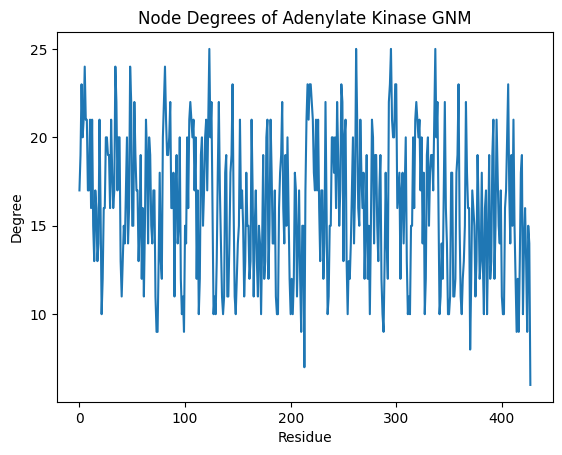

In [26]:
plt.title('Node Degrees of Adenylate Kinase GNM')
plt.ylabel('Degree')
plt.yticks(np.arange(5*(deg_min//5), deg_max+1, 5))
plt.xlabel('Residue')
plt.plot(degrees)
plt.show()

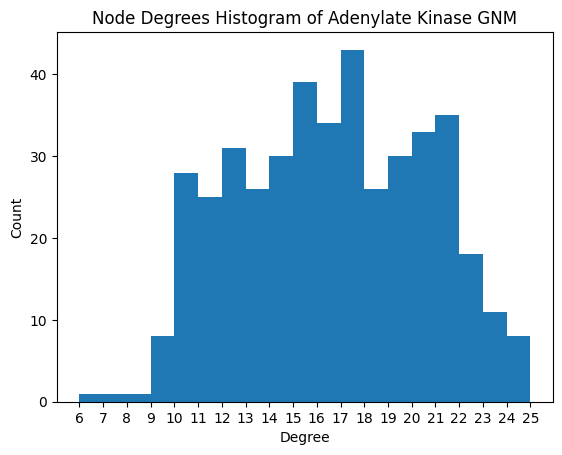

In [27]:
plt.title('Node Degrees Histogram of Adenylate Kinase GNM')
plt.ylabel('Count')
plt.xticks(np.arange(deg_min, deg_max+1), horizontalalignment = 'center')
plt.xlabel('Degree')
plt.hist(degrees, bins = int(deg_max-deg_min))
plt.show()

### Contact Map

The non-diagonal part of the Kirchhoff Matrix is the negative contact map (adjacency matrix).

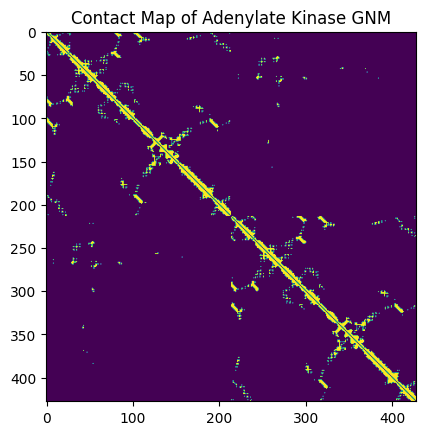

In [28]:
adjacency = -kirchhoff
adjacency = np.where(adjacency >= 0, adjacency, 0)

plt.title('Contact Map of Adenylate Kinase GNM')
plt.imshow(adjacency)
plt.show()

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


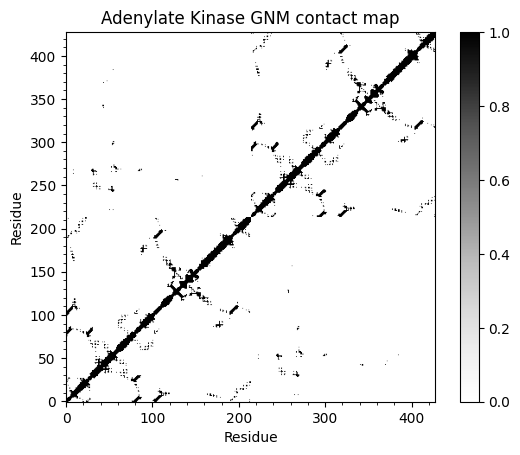

In [29]:
# alternatively
showContactMap(gnm);

### Cross Correlation

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


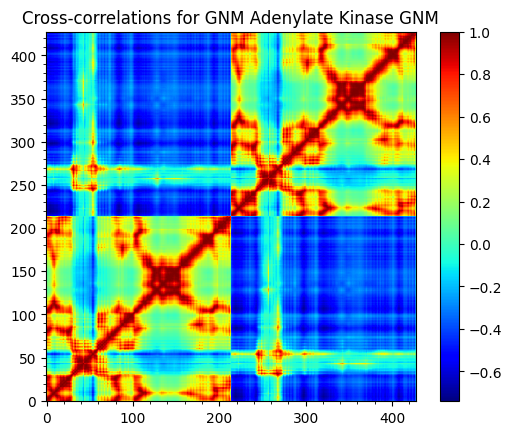

In [30]:
showCrossCorr(gnm);

### Fluctuations

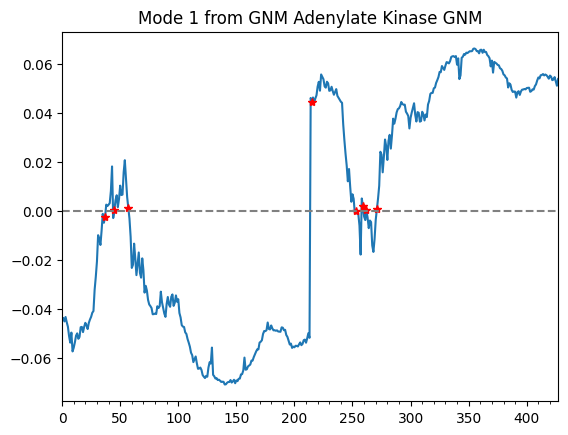

In [31]:
showMode(gnm[0], hinges = True, zero = True);

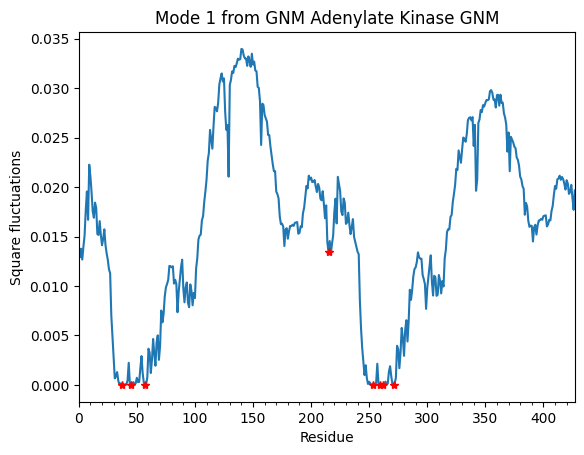

In [32]:
showSqFlucts(gnm[0], hinges = True);

#### Protein Bipartition

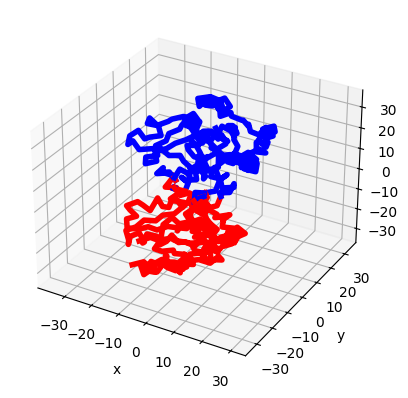

In [33]:
showProtein(calphas, mode=gnm[0]);

## Anisotropic Network Model (ANM)

An extension of GNM where fluctuations are directional (vectors) rather than magnitudes.

In [34]:
anm = ANM('Adenylate Kinase ANM')

### Hessian Matrix

For a protein with $N$ residues, the Hessian matrix $H \in \mathbb{R}^{3N \times 3N}$ contains the second derivatives of the potential energy $V$ with respect to the residue coordinates. If we divide $H$ into $3 \times 3$ blocks, then the $ij$-th block, $H_{ij}$ is then:

$H_{ij} = \frac{\partial^2 V}{\partial r_{i} \partial r_{j}}$

where $r_i \in \mathbb{R}^3$ is the cartesian coordinates of the $i$-th residue.

In [35]:
anm.buildHessian(calphas)
anm.calcModes()

@> Hessian was built in 0.08s.
@> 20 modes were calculated in 0.25s.


In [36]:
writeNMD('4ake_anm_modes.nmd', anm, calphas)

'4ake_anm_modes.nmd'

In [37]:
#pathVMD("/Users/georgead/Desktop/VMD2.0.0a7-pre1.app/Contents/vmd2/bin/vmd")

In [38]:
viewNMDinVMD('4ake_anm_modes.nmd')

@> WARNING VMD path is not set by user, looking for it.


![](4ake_anm_modes.gif)